In [1]:
#importing required modules
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#reading in data and clean it
df=pd.read_excel('../data/Ábrához-Bálintnak.xlsx')
df.columns=['id','gene','value','condition']
df['gene']=df['gene'].apply(lambda cell: cell.split('_')[0].upper())
df['condition']=df['condition'].apply(lambda cell: 'control' if cell=='Kontrol' else 'lda')
df.head(n=3)

,id,gene,value,condition
0,1,CAPN8,0.202448,control
1,2,CAPN8,0.653737,lda
2,4,CAPN8,0.983328,lda


In [3]:
colors=['#e6194b', '#3cb44b', '#ffe119', '#4363d8', '#f58231', '#911eb4', '#46f0f0', '#f032e6',
                  '#bcf60c','#fabebe', '#008080', '#e6beff', '#9a6324', '#fffac8', '#800000', '#aaffc3',
                  '#808000', '#ffd8b1','#000075', '#00FF7F','#000000']

In [4]:
control_fil=df['condition']=='control'
filtered_df=df[control_fil]
lengths=pd.Series(filtered_df['gene'].unique()).apply(
    lambda gene_name:np.mean(filtered_df.loc[filtered_df['gene']==gene_name]['value'])
)
lengths.index=pd.Series(filtered_df['gene'].unique())
lengths=lengths.sort_values(ascending=True)
lengths

ITGA5    1.610718e-02
ITGA7    2.242382e-02
CAPN8    5.363747e-02
MLY9     3.221628e-01
UGTA1    1.139606e+00
GKN2     1.035473e+03
GSMDC    7.036874e+03
SMPD     7.274255e+03
CCDC     3.163129e+06
dtype: float64

In [5]:
#function for plotting
def barh_plotter(gene_name,df):
    global gene_indexer
    global gene_names
    #define filter to differentiate between lda affected and control individuals
    control_fil=df['condition']=='control'
    
    control_hits=df[control_fil]
    lda_hits=df[~control_fil]
    
    control_subdf=control_hits.loc[control_hits['gene']==gene_name]
    lda_subdf=lda_hits.loc[lda_hits['gene']==gene_name]
    
    #control individuals
    axs[0].errorbar(
        np.mean(control_subdf['value']),
        gene_indexer,
        xerr=np.std(np.log(control_subdf['value'])),
        color='k',
        elinewidth=0.8,
        xlolims=np.mean(control_subdf['value'])
    )
    
    axs[0].barh(
        gene_indexer,
        np.mean(control_subdf['value']),
        alpha=.5,
        color=colors[gene_indexer]
    )
    axs[0].set_axisbelow(True)
    
    #LDA affected individuals
    axs[1].errorbar(
        np.mean(lda_subdf['value']),
        gene_indexer,
        xerr=np.std(np.log(lda_subdf['value'])),
        color='k',
        elinewidth=0.8,
        xlolims=np.mean(lda_subdf['value'])
    )
    
    axs[1].barh(
        gene_indexer,
        np.mean(lda_subdf['value']),
        alpha=.5,
        color=colors[gene_indexer]
    )
    
    if gene_name not in gene_names:
        gene_names.append(gene_name)
    gene_indexer+=1

/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_asarray.py:102: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)


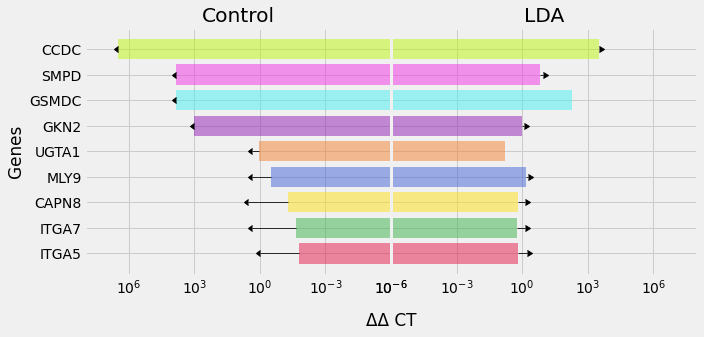

In [6]:
plt.style.use('fivethirtyeight')
fig, axs = plt.subplots(figsize=(10,5), ncols=2, sharey=True,sharex=False)

axs[0].invert_xaxis()
axs[0].set_xscale('log')
axs[1].set_xscale('log')
axs[0].set_xlim(100000000,0.000001)
axs[1].set_xlim(0.000001,100000000)

gene_indexer=0
gene_names=[]
pd.Series(lengths.index.values).apply(barh_plotter,args=(df,))
axs[0].set_yticks(np.arange(0,len(gene_names)))
axs[0].set_yticklabels(gene_names)
axs[0].set_title('Control')
axs[1].set_title('LDA')
axs[0].set_ylabel('Genes')
axs[0].set_xlabel('ΔΔ CT')
axs[0].xaxis.set_label_coords(1, -0.15)
plt.tight_layout()
plt.subplots_adjust(hspace=0,wspace=0)
plt.savefig('../results/qPCR_results.tiff',dpi=1000)